In [18]:
import pandas as pd
import numpy as np

import seaborn
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

In [19]:
# load data

df_app = pd.read_csv('dr_applications.csv')
df_loans = pd.read_csv('dr_loans.csv')

df_app.head(5)

,Unnamed: 0,profile_id,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,know_source,loan_purpose,...,emp_position,income,income_period,income_source,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code
0,1,4943,d4a7c58a-8cff-4985-a6f5-87dcfb683326,2018-05-31 17:57:51,2018-06-01 04:47:52,REJECT,26,1700,SEARCH,HEALTH,...,NaN,8000.0,TWO_TPM,HUSBAND_WIFE_WORKS,2018-06-07,0.0,SIBLINGS,1,68,95.0
1,2,4984,a1de058f-d232-41bf-ac56-b730c8d4735e,2018-06-01 00:58:08,2018-06-01 01:36:23,REJECT,22,800,BANNER,REPAIR,...,Кравець,5800.0,MONTHLY,NaN,2018-06-09,0.0,NaN,1,50,NaN
2,3,4992,ea0f94f7-a50a-4191-875b-b55bde431f91,2018-06-01 02:39:49,2018-06-01 17:25:33,REJECT,15,1500,SEARCH,OTHER,...,Зварювальник,10000.0,TWO_TPM,NaN,2018-06-10,650.0,NaN,1,93,67.0
3,4,4995,22dd6c3a-4cf0-429e-93d6-dfbcd8d2654e,2018-06-01 03:01:27,2018-06-01 03:12:57,REJECT,7,700,FRIENDS,HEALTH,...,Керівник,18000.0,MONTHLY,NaN,2018-06-06,1500.0,RELATIVES,1,50,96.0
4,5,4724,0e05eff2-997d-4b6a-950d-cc46a2982599,2018-06-01 06:16:55,2018-06-01 06:30:18,REJECT,28,2000,SEARCH,SMALLP,...,Водій,5000.0,TWO_TPM,NaN,2018-06-15,0.0,RELATIVES,1,50,98.0


'Unnamed: 0'- номер записи в таблице\
'profile_id'- уникальный id профиля клиента в системе\
'business_key'- id процесса подачи заявки на получение кредита;\
'start_time'- начало заполнения заявки\
'end_time'- окончание процесса заполнения заявки\
'app_status_code'- итоговый статус кредитной заявки: CCANCEL – заявка согласована но клиент отказался от получения кредита, LOAN – заявка согласована и кредит выдан, REJECT – по заявке предоставлен отказ;\
'credit_term'- запрошенный клиентом срок кредита\
'credit_amount'-запрошенная клиентом сумма кредита (в разные периода действовало разное ограничение на максимальную сумму кредита);\
'know_source'- откуда клиент узнал о кредите: BANNER – баннер в Интернет, BOARD – бигборд на улице, FORUM – форум в Интернет, FRIENDS, OTHER, PRESS - пресса, SEARCH – поиск в Интернет, SN – социальные сети; \
'loan_purpose'- цель кредита: BIGP – большая покупка, DEBT – погашение других долгов, SMALLP – мелкая покупка, остальное должно быть понятно из названия категорий;\
'passport_type'-\
'social_status'-социальный статус: MATERNITY – декретный отпуск, NONE – без социального статуса, PENSIONER – пенсионер, SOCIAL_BENEFITS – получает социальные выплаты, STUDENT – студент;\
'education'-education – уровень образования :незаконченное среднее - USCH, среднее - SCH, среднее-специальное - SSCH, незаконченное высшее - UHIGH, высшее - HIGН, учёная степень DEGREE;\
'faculty'- факультет\
'birthday'- дата рождения;\
'gender'- пол;\
'family_status'- семейный статус\
'children16'- количество детей в возрасте до 18 лет;\
'liv_equal'- адрес регистрации и проживания совпадают;\
'emp_type'- вид занятости\
'emp_position'- должность;\
'income'- сумма дохода;\
'income_period'- период получения дохода\
'income_source'- источник получения дохода\
'income_next'- дата следующего дохода;\
'exp_loans'- платежи по действующим кредитам;\
'cp_relation'- тип связи с контактным лицом\
'app_rank'-\
'mphone_code'-\
'cp_phone_code'-\

In [20]:
df_app.count()

Unnamed: 0         153795
profile_id         153795
business_key       153795
start_time         153795
end_time           153795
app_status_code    153795
credit_term        153795
credit_amount      153795
know_source        153795
loan_purpose       153795
passport_type      153795
social_status      153795
education          153795
faculty            128204
birthday           153795
gender             153795
family_status      153795
children16         153795
liv_equal          153795
emp_type           153795
emp_position       135069
income             153795
income_period      153574
income_source       16308
income_next        153570
exp_loans          153399
cp_relation        123209
app_rank           153795
mphone_code        153795
cp_phone_code      125525
dtype: int64

In [21]:
df_app.columns

Index(['Unnamed: 0', 'profile_id', 'business_key', 'start_time', 'end_time',
       'app_status_code', 'credit_term', 'credit_amount', 'know_source',
       'loan_purpose', 'passport_type', 'social_status', 'education',
       'faculty', 'birthday', 'gender', 'family_status', 'children16',
       'liv_equal', 'emp_type', 'emp_position', 'income', 'income_period',
       'income_source', 'income_next', 'exp_loans', 'cp_relation', 'app_rank',
       'mphone_code', 'cp_phone_code'],
      dtype='object')

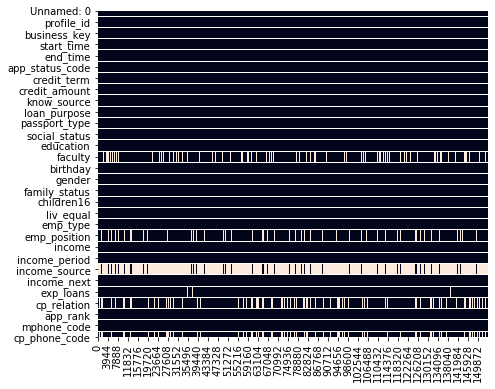

In [22]:
# plot heatmap with missing values
plt.figure(figsize=(7,6))
sns.heatmap(df_app.isnull().T, cbar=False)
plt.show()

## Filling NaN values

In [43]:
# we take only the latest records with accepted loans by 'profile_id'

df_loans_cleaned = pd.DataFrame.copy(df_loans.drop_duplicates(subset=['profile_id'], keep='last'))
df_app_cleaned = pd.DataFrame.copy(df_app[df_app['app_status_code']=='LOAN'].drop_duplicates(subset=['profile_id'], keep='last'))

In [44]:
# create new merged DF
df_result = pd.merge(df_loans_cleaned[['profile_id','status','product']], df_app_cleaned, on ='profile_id')
df_result.head()

,profile_id,status,product,Unnamed: 0,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,...,emp_position,income,income_period,income_source,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code
0,701636,CLOSED,START_11,80356,ee723eca-b68f-4ebf-aa03-2cda225b06ca,2019-07-07 20:34:15,2019-07-07 21:03:02,LOAN,28,1400,...,Інженер мікробіолог,950.0,TWO_TPM,NaN,2019-07-28,500.0,SIBLINGS,1,97,98.0
1,525268,OVERDUE,START_11,54691,1b2dc61d-311b-40c8-a23d-e99fa0cab17e,2019-04-09 02:39:50,2019-04-09 03:24:27,LOAN,27,2000,...,Оператор лінії,13000.0,TWO_TPM,NaN,2019-04-15,1000.0,COLLEAGUES,1,97,68.0
2,371649,OVERDUE,START_11,50570,22b9208c-5e72-4861-b10e-84f77177ad11,2019-03-25 10:38:22,2019-03-25 11:04:59,LOAN,28,4000,...,NaN,12000.0,WEEKLY,PARENTS_HELP,2019-03-30,4000.0,SIBLINGS,1,98,97.0
3,851470,OVERDUE,START_11,101553,0d0327f1-dfbd-47da-95f5-8870566f667c,2019-08-27 09:36:49,2019-08-27 10:32:14,LOAN,28,4000,...,NaN,7000.0,MONTHLY,PENSION,2019-09-25,500.0,SIBLINGS,1,99,50.0
4,157515,OVERDUE,START_11,32614,3e03067a-4bcf-41c9-bdfa-6eb489d9e5a3,2019-02-13 00:55:57,2019-02-15 14:22:09,LOAN,28,2000,...,NaN,7500.0,MONTHLY,SOCIAL_ASSISTANCE,2019-03-08,2000.0,SPOUSE,1,63,63.0


In [45]:
# Function to get persantage of closed loans by selected column
def get_percents(data_frame, column):
    d1 = pd.DataFrame.copy(data_frame[data_frame['status']=='CLOSED'].groupby(column)
             .agg(closed_persent=pd.NamedAgg(column='status', aggfunc='count'))
             .reset_index()
    )

    d2 = pd.DataFrame.copy(data_frame.groupby(column)
             .agg(closed_persent=pd.NamedAgg(column='status', aggfunc='count'))
             .reset_index()
    )

    d1['closed_persent'] = 100/d2['closed_persent']*d1['closed_persent']
    print(d1.sort_values(by='closed_persent', ascending= False))

In [46]:
# check grouped df by column 'income_period'
get_percents(df_result, 'income_period')

  income_period  closed_persent
1       MONTHLY       58.527986
2       TWO_TPM       58.393605
3        WEEKLY       56.870229
4          WORK       51.219512
0         DAILY       50.934579


income period has an impact on the percentage of payments on loans, therefore attach the value to the missing data is 'WORK'

In [47]:
get_percents(df_result, 'income_period')

  income_period  closed_persent
1       MONTHLY       58.527986
2       TWO_TPM       58.393605
3        WEEKLY       56.870229
4          WORK       51.219512
0         DAILY       50.934579


In [48]:
# fill NaN values in column 'emp_position'
a = pd.DataFrame.copy(df_result)
a['emp_position'].fillna('other', inplace = True)
a.head()

,profile_id,status,product,Unnamed: 0,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,...,emp_position,income,income_period,income_source,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code
0,701636,CLOSED,START_11,80356,ee723eca-b68f-4ebf-aa03-2cda225b06ca,2019-07-07 20:34:15,2019-07-07 21:03:02,LOAN,28,1400,...,Інженер мікробіолог,950.0,TWO_TPM,NaN,2019-07-28,500.0,SIBLINGS,1,97,98.0
1,525268,OVERDUE,START_11,54691,1b2dc61d-311b-40c8-a23d-e99fa0cab17e,2019-04-09 02:39:50,2019-04-09 03:24:27,LOAN,27,2000,...,Оператор лінії,13000.0,TWO_TPM,NaN,2019-04-15,1000.0,COLLEAGUES,1,97,68.0
2,371649,OVERDUE,START_11,50570,22b9208c-5e72-4861-b10e-84f77177ad11,2019-03-25 10:38:22,2019-03-25 11:04:59,LOAN,28,4000,...,other,12000.0,WEEKLY,PARENTS_HELP,2019-03-30,4000.0,SIBLINGS,1,98,97.0
3,851470,OVERDUE,START_11,101553,0d0327f1-dfbd-47da-95f5-8870566f667c,2019-08-27 09:36:49,2019-08-27 10:32:14,LOAN,28,4000,...,other,7000.0,MONTHLY,PENSION,2019-09-25,500.0,SIBLINGS,1,99,50.0
4,157515,OVERDUE,START_11,32614,3e03067a-4bcf-41c9-bdfa-6eb489d9e5a3,2019-02-13 00:55:57,2019-02-15 14:22:09,LOAN,28,2000,...,other,7500.0,MONTHLY,SOCIAL_ASSISTANCE,2019-03-08,2000.0,SPOUSE,1,63,63.0


In [49]:
# calculate persentage of closed loans by records with NaN values in 'emp_position'
a = pd.DataFrame.copy(df_result)
a['emp_position'].fillna('other', inplace = True)
get_percents(a[a['emp_position']=='other'], 'emp_position')

  emp_position  closed_persent
0        other       57.598784


##### cp_relation

In [50]:
# check group df by column 'cp_relation' for filling NaN
get_percents(df_result, 'cp_relation')

  cp_relation  closed_persent
2     FRIENDS       60.024450
3   NEIGHBORS       59.803922
6    SIBLINGS       58.083067
1  COLLEAGUES       57.931034
5   RELATIVES       56.983240
0    CHILDREN       54.347826
4     PARENTS       51.593323
7      SPOUSE       50.635209


In [51]:
df_cp_relation = pd.DataFrame.copy(df_result)
df_cp_relation['cp_relation'].fillna('other', inplace = True)
get_percents(df_cp_relation[df_cp_relation['cp_relation']=='other'], 'cp_relation')

  cp_relation  closed_persent
0       other       64.868421


When the field is not indicated, the loan repayment percentage is higher. This may mean that the person himself found this site. Set missing value by 'MYSELF'

##### cp_phone_code

In [52]:
# list with the most polular elements in column
ls = [63, 66,97.0,98.0, 68.0,96.0 ,99.0 ,50.0 ,95.0 ,93.0  ,67.0  ]

for i in range(0,len(ls)):
    get_percents(df_result[df_result['mphone_code']==ls[i]], 'mphone_code')
    

   mphone_code  closed_persent
0           63       58.909853
   mphone_code  closed_persent
0           66       57.391304
   mphone_code  closed_persent
0           97       61.520999
   mphone_code  closed_persent
0           98       56.094527
   mphone_code  closed_persent
0           68       56.137184
   mphone_code  closed_persent
0           96       59.872611
   mphone_code  closed_persent
0           99        55.28914
   mphone_code  closed_persent
0           50       54.558611
   mphone_code  closed_persent
0           95       53.706112
   mphone_code  closed_persent
0           93       63.649025
   mphone_code  closed_persent
0           67       61.904762


##### emp_position and income_source

In [53]:
# filling NaN values in column 'emp_position'
df_income = pd.DataFrame.copy(df_result)
a['emp_position'].fillna('other', inplace = True)
get_percents(a[a['emp_position']=='other'], 'emp_position')

  emp_position  closed_persent
0        other       57.598784


In [54]:
df_result[(df_result['emp_position'].isnull()==True) & (df_result['emp_position'].isnull()==True)].head()

,profile_id,status,product,Unnamed: 0,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,...,emp_position,income,income_period,income_source,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code
2,371649,OVERDUE,START_11,50570,22b9208c-5e72-4861-b10e-84f77177ad11,2019-03-25 10:38:22,2019-03-25 11:04:59,LOAN,28,4000,...,NaN,12000.0,WEEKLY,PARENTS_HELP,2019-03-30,4000.0,SIBLINGS,1,98,97.0
3,851470,OVERDUE,START_11,101553,0d0327f1-dfbd-47da-95f5-8870566f667c,2019-08-27 09:36:49,2019-08-27 10:32:14,LOAN,28,4000,...,NaN,7000.0,MONTHLY,PENSION,2019-09-25,500.0,SIBLINGS,1,99,50.0
4,157515,OVERDUE,START_11,32614,3e03067a-4bcf-41c9-bdfa-6eb489d9e5a3,2019-02-13 00:55:57,2019-02-15 14:22:09,LOAN,28,2000,...,NaN,7500.0,MONTHLY,SOCIAL_ASSISTANCE,2019-03-08,2000.0,SPOUSE,1,63,63.0
10,6690,CLOSED,START,213,2d8885d4-3e99-4014-a8b0-f45bfe33b22e,2018-06-11 15:37:15,2018-06-11 16:17:21,LOAN,28,2000,...,NaN,6000.0,TWO_TPM,PARENTS_HELP,2018-07-07,0.0,NEIGHBORS,1,95,66.0
20,36091,CLOSED,START,3299,8820bbf4-b715-4848-8b8f-d878e8aa1edc,2018-08-01 16:48:50,2018-08-01 18:24:07,LOAN,15,1000,...,NaN,2500.0,TWO_TPM,OTHER,2018-09-10,500.0,CHILDREN,1,99,67.0


# Data cleaning


In [55]:
# fill NaN values and clean df

# drop 4 rows from df
df_result.dropna(subset=['income_next','exp_loans'], how='any', inplace = True)

# fill with  certain values
df_result['faculty'].fillna('OTHER', inplace = True)
df_result['cp_relation'].fillna('MYSELF', inplace = True)
df_result["income_period"].fillna("WORK", inplace = True) 

# fill cp_phone_code column:
#list with the most popular elements
ls = [63, 66,97.0,98.0, 68.0,96.0 ,99.0 ,50.0 ,95.0 ,93.0  ,67.0]
#get mask of NaNs
mask = df_result['cp_phone_code'].isnull()
#count rows with NaNs
lendth = mask.sum()
#create array with size l
set_list = np.random.choice(ls, size=lendth)
#set NaNs values
df_result.loc[mask, 'cp_phone_code'] = set_list

# New column with status of income:
# так как в колонке с должностью мы имеем более 2000 значений, соединяем данную колонку с колонкой другого дохода и устанавливаем только статус:
# 3 - пользователь имеет и работу и другой источник дохода
# 2 - только работу
# 1 - только другой источник
# 0 - ничего не указал
df_result['income_status'] = ''
for i in range(len(df_result)):
    if ((pd.notnull(df_result['emp_position'].iloc[i])) & (pd.notnull(df_result['income_source'].iloc[i]))):
        df_result['income_status'].iloc[i] = 3
    elif ((pd.notnull(df_result['emp_position'].iloc[i])) & (pd.isnull(df_result['income_source'].iloc[i]))):
        df_result['income_status'].iloc[i] = 2
    elif ((pd.isnull(df_result['emp_position'].iloc[i])) & (pd.notnull(df_result['income_source'].iloc[i]))):
        df_result['income_status'].iloc[i] = 1
    elif ((pd.isnull(df_result['emp_position'].iloc[i])) & (pd.isnull(df_result['income_source'].iloc[i]))):
        df_result['income_status'].iloc[i] = 0

#drop non-important columns
df_result.drop(columns = ['emp_position', 'income_source', 'app_status_code'], axis = 1, inplace = True)



## Outliers detecting

In [61]:
# simple outliers clear
# format for date calculating
fmt = "%Y-%m-%d %H:%M:%S"

# get current date and convert it to necessary format
current_dt = datetime.now()
dt_string = current_dt.strftime(fmt)
cur_date = datetime.strptime(dt_string,fmt)

# simple detect outliers and them deleting 
index_list = []
for i in range(len(df_result)):
    if ((cur_date - datetime.strptime((df_result['income_next'].iloc[i]  + ' 00:00:00'), fmt)).days <-30):
            index_list.append(i)
        
df_result.drop(index_list, axis=0, inplace=True)

# delete 12 records
df_result.drop((df_result[df_result['children16']>10]).index, axis=0, inplace=True)

# many records with clearly inflated incomes
#df.drop((df[df['income']>100000]).index, axis=0, inplace=True)


In [ ]:
df_result[]

# Feature engineering

In [62]:
#create new dataframe for preprocessing
df = pd.DataFrame.copy(df_result)
df.head()

,profile_id,status,product,Unnamed: 0,business_key,start_time,end_time,credit_term,credit_amount,know_source,...,emp_type,income,income_period,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code,income_status
0,701636,CLOSED,START_11,80356,ee723eca-b68f-4ebf-aa03-2cda225b06ca,2019-07-07 20:34:15,2019-07-07 21:03:02,28,1400,SN,...,OFFICIAL,950.0,TWO_TPM,2019-07-28,500.0,SIBLINGS,1,97,98.0,2
1,525268,OVERDUE,START_11,54691,1b2dc61d-311b-40c8-a23d-e99fa0cab17e,2019-04-09 02:39:50,2019-04-09 03:24:27,27,2000,SEARCH,...,OFFICIAL,13000.0,TWO_TPM,2019-04-15,1000.0,COLLEAGUES,1,97,68.0,2
2,371649,OVERDUE,START_11,50570,22b9208c-5e72-4861-b10e-84f77177ad11,2019-03-25 10:38:22,2019-03-25 11:04:59,28,4000,SEARCH,...,UNEMPLOYED,12000.0,WEEKLY,2019-03-30,4000.0,SIBLINGS,1,98,97.0,1
3,851470,OVERDUE,START_11,101553,0d0327f1-dfbd-47da-95f5-8870566f667c,2019-08-27 09:36:49,2019-08-27 10:32:14,28,4000,SEARCH,...,UNEMPLOYED,7000.0,MONTHLY,2019-09-25,500.0,SIBLINGS,1,99,50.0,1
4,157515,OVERDUE,START_11,32614,3e03067a-4bcf-41c9-bdfa-6eb489d9e5a3,2019-02-13 00:55:57,2019-02-15 14:22:09,28,2000,BANNER,...,UNEMPLOYED,7500.0,MONTHLY,2019-03-08,2000.0,SPOUSE,1,63,63.0,1


In [63]:
# drop not important features
df.drop(columns=['Unnamed: 0', 'profile_id', 'business_key'], axis=0, inplace=True)

## Date columns

In [64]:
df['birthday'] = df['birthday'] + ' 00:00:00'
df['income_next'] = df['income_next'] + ' 00:00:00' 
df[['income_next','birthday' ]].head()

,income_next,birthday
0,2019-07-28 00:00:00,1994-03-30 00:00:00
1,2019-04-15 00:00:00,1991-12-25 00:00:00
2,2019-03-30 00:00:00,1997-11-21 00:00:00
3,2019-09-25 00:00:00,1974-09-26 00:00:00
4,2019-03-08 00:00:00,1991-01-02 00:00:00


In [65]:
# calculate new column 'filling_time'


current_dt = datetime.now()
dt_string = current_dt.strftime(fmt)
var_date = datetime.strptime(dt_string,fmt)
df['filling_time'] = ''

for i in range(len(df)):
    df['filling_time'].iloc[i] = ((datetime.strptime(df['end_time'].iloc[i], fmt) - datetime.strptime(df['start_time'].iloc[i], fmt)).seconds / 60)
    
    if isinstance(df['birthday'].iloc[i],str):
        df['birthday'].iloc[i] = (var_date - datetime.strptime(df['birthday'].iloc[i], fmt)).days / 365
    
    if isinstance(df['income_next'].iloc[i],str):
        df['income_next'].iloc[i] = (datetime.strptime(df['income_next'].iloc[i], fmt) - datetime.strptime(df['end_time'].iloc[i], fmt)).days
    
    
    
df[['filling_time', 'income_next', 'birthday']].head()



,filling_time,income_next,birthday
0,28.7833,20,26.0603
1,44.6167,5,28.3233
2,26.6167,4,22.411
3,55.4167,28,45.5808
4,806.2,20,29.3014


In [66]:
df.drop(columns=['end_time', 'start_time'], axis=0, inplace=True)

## Category features

Family_status


In [67]:
df['family_status'].value_counts()

SINGLE           3915
MARRIAGE         2944
DIVORCED          785
LIVE_TOGETHER     756
WIDOW              66
Name: family_status, dtype: int64

In [68]:
get_percents(df_result, 'family_status')

   family_status  closed_persent
3         SINGLE       59.182631
2       MARRIAGE       58.831522
0       DIVORCED       55.286624
1  LIVE_TOGETHER       52.513228
4          WIDOW       51.515152


In [69]:
# create LabelEncoder object
le = LabelEncoder()

# set mapping depending on the probability of loan repayment
hc_mapping = {'WIDOW': 0, 'LIVE_TOGETHER': 1, 'DIVORCED': 2, 'MARRIAGE': 3, 'SINGLE': 4}

# labeled column 'family_status' 
df['family_status'] = df['family_status'].apply(lambda val: hc_mapping[val])

df.head(1)

,status,product,credit_term,credit_amount,know_source,loan_purpose,passport_type,social_status,education,faculty,...,income,income_period,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code,income_status,filling_time
0,CLOSED,START_11,28,1400,SN,SMALLP,PASSPORT,NONE,HIGH,FOOD_INDUSTRY,...,950.0,TWO_TPM,20,500.0,SIBLINGS,1,97,98.0,2,28.7833


 gender

In [70]:
get_percents(df_result, 'gender')

  gender  closed_persent
1      M       58.532042
0      F       57.198192


In [71]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender']) # transorming feature
df['gender'].head()

0    0
1    1
2    0
3    1
4    0
Name: gender, dtype: int32

know_source

In [72]:
get_percents(df_result, 'know_source')

  know_source  closed_persent
6       PRESS       76.470588
5       OTHER       63.000000
7      SEARCH       58.683473
0      BANNER       58.364591
1       BOARD       58.333333
2       FORUM       54.455446
8          SN       54.389722
3     FRIENDS       54.315476
4       METRO       48.571429


In [73]:
# set mapping depending on the probability of loan repayment
hc_mapping = {'METRO': 0, 'FORUM': 1, 'SN': 2, 'FRIENDS': 3, 'BANNER': 4, 'SEARCH': 5, 'BOARD': 6, 'OTHER': 7, 'PRESS': 8 }

# labeled column 'know_source' 
df['know_source'] = df['know_source'].apply(lambda val: hc_mapping[val])
df['know_source'].head(1)

0    2
Name: know_source, dtype: int64

loan_purpose

In [74]:
get_percents(df_result, 'loan_purpose')

  loan_purpose  closed_persent
9   TRAVELLING       64.596273
8       SMALLP       62.477876
2         DEBT       59.193357
1  CELEBRATION       58.620690
0         BIGP       58.221477
7       REPAIR       57.882353
5        OTHER       56.804734
3    EDUCATION       56.060606
6         RENT       54.117647
4       HEALTH       53.041363


In [75]:
# set mapping depending on the probability of loan repayment
hc_mapping = {'HEALTH': 0, 'RENT': 1, 'EDUCATION': 2, 'OTHER': 3, 'REPAIR': 4, 'BIGP': 5, 'CELEBRATION': 6, 'DEBT': 7, 'SMALLP': 8, 'TRAVELLING': 9}

# labeled column 'loan_purpose' 
df['loan_purpose'] = df['loan_purpose'].apply(lambda val: hc_mapping[val])
df['loan_purpose'].head(3)

0    8
1    6
2    5
Name: loan_purpose, dtype: int64

pass_type

In [76]:
df['passport_type'].value_counts()

PASSPORT    7465
IDCARD      1001
Name: passport_type, dtype: int64

In [77]:
df['passport_type'] = le.fit_transform(df['passport_type']) # transorming feature

In [78]:
df['passport_type'].value_counts()

1    7465
0    1001
Name: passport_type, dtype: int64

social_status

In [79]:
get_percents(df_result, 'social_status')

     social_status  closed_persent
4          STUDENT       63.929147
1             NONE       58.397601
2        PENSIONER       53.125000
3  SOCIAL_BENEFITS       50.649351
0        MATERNITY       50.175439


In [80]:
hc_mapping = {'MATERNITY': 0, 'SOCIAL_BENEFITS': 1, 'PENSIONER': 2, 'NONE': 3, 'STUDENT': 4}

# labeled column 'know_source' 
df['social_status'] = df['social_status'].apply(lambda val: hc_mapping[val])

##### education

In [81]:
get_percents(df_result, 'education')

  education  closed_persent
0    DEGREE       75.510204
1      HIGH       64.411765
4     UHIGH       60.740741
5      USCH       52.941176
3      SSCH       50.270062
2       SCH       48.923445


In [82]:
# labeled with the dependencies of education level
hc_mapping = {'USCH': 0, 'SCH': 1, 'SSCH': 2, 'UHIGH': 3, 'HIGH': 4, 'DEGREE': 5}

# labeled column 'education' 
df['education'] = df['education'].apply(lambda val: hc_mapping[val])

##### faculty

In [83]:
get_percents(df_result, 'faculty')

          faculty  closed_persent
7        MILITARY       65.555556
5            MATH       64.444444
1         ECONOMY       62.738420
6        MEDICINE       62.393162
3      HUMANITIES       61.142857
4             LAW       61.090909
10      TECHNICAL       60.301109
9         SCIENCE       58.196721
8           OTHER       55.123547
0    CONSTRUCTION       48.491379
2   FOOD_INDUSTRY       48.132780


In [84]:
# labeled with the dependencies of education level
hc_mapping = {'FOOD_INDUSTRY': 0, 'CONSTRUCTION': 1, 'OTHER': 2, 'SCIENCE': 3, 'TECHNICAL': 4, 'LAW': 5, 'HUMANITIES': 6, 'MEDICINE': 7, 'ECONOMY': 8, 'MATH': 9, 'MILITARY': 10}

# labeled column 'faculty' 
df['faculty'] = df['faculty'].apply(lambda val: hc_mapping[val])

##### live_equal

In [85]:
df['liv_equal'] = le.fit_transform(df['liv_equal']) # transorming feature

##### emp_type

In [86]:
get_percents(df_result, 'emp_type')

            emp_type  closed_persent
3                SPD       62.574257
1           OFFICIAL       61.280488
4         UNEMPLOYED       57.630162
2              OWNER       54.748603
0  EMPLOYMENT_CENTER       53.658537
5         UNOFFICIAL       52.865578


In [87]:
# labeled with the dependencies of education level
hc_mapping = {'EMPLOYMENT_CENTER': 0, 'UNOFFICIAL': 1, 'OWNER': 2, 'UNEMPLOYED': 3, 'OFFICIAL': 4, 'SPD': 5}

# labeled column 'emp_type' 
df['emp_type'] = df['emp_type'].apply(lambda val: hc_mapping[val])

income_period

In [88]:
get_percents(df_result, 'income_period')

  income_period  closed_persent
2       TWO_TPM       58.432807
1       MONTHLY       58.392857
3        WEEKLY       56.683805
4          WORK       51.219512
0         DAILY       51.173709


In [89]:
# labeled with the dependencies of education level
hc_mapping = {'DAILY': 0, 'WORK': 1, 'WEEKLY': 2, 'TWO_TPM': 3, 'MONTHLY': 4}

# labeled column 'income_period' 
df['income_period'] = df['income_period'].apply(lambda val: hc_mapping[val])

cp_relation

In [90]:
get_percents(df_result, 'cp_relation')

  cp_relation  closed_persent
3      MYSELF       64.933333
2     FRIENDS       59.864365
4   NEIGHBORS       59.803922
7    SIBLINGS       58.037444
1  COLLEAGUES       57.996894
6   RELATIVES       56.978967
0    CHILDREN       54.014599
5     PARENTS       51.755725
8      SPOUSE       50.550459


In [91]:
# labeled with the dependencies of education level
hc_mapping = {'SPOUSE': 0, 'PARENTS': 1, 'CHILDREN': 2,'RELATIVES': 3, 'COLLEAGUES': 4, 'SIBLINGS': 5, 'NEIGHBORS': 6, 'FRIENDS': 7, 'MYSELF': 8 }

# labeled column 'cp_relation' 
df['cp_relation'] = df['cp_relation'].apply(lambda val: hc_mapping[val])

In [92]:
df.head()

,status,product,credit_term,credit_amount,know_source,loan_purpose,passport_type,social_status,education,faculty,...,income,income_period,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code,income_status,filling_time
0,CLOSED,START_11,28,1400,2,8,1,3,4,0,...,950.0,3,20,500.0,5,1,97,98.0,2,28.7833
1,OVERDUE,START_11,27,2000,5,6,0,3,2,4,...,13000.0,3,5,1000.0,4,1,97,68.0,2,44.6167
2,OVERDUE,START_11,28,4000,5,5,1,4,1,6,...,12000.0,2,4,4000.0,5,1,98,97.0,1,26.6167
3,OVERDUE,START_11,28,4000,5,0,1,2,3,4,...,7000.0,4,28,500.0,5,1,99,50.0,1,55.4167
4,OVERDUE,START_11,28,2000,4,5,1,0,2,2,...,7500.0,4,20,2000.0,0,1,63,63.0,1,806.2


product

In [93]:
# labeled with the dependencies of education level
hc_mapping = {'START_11': 0, 'START': 1}

# labeled column 'product' 
df['product'] = df['product'].apply(lambda val: hc_mapping[val])

Target - status

In [94]:
# labeled with the dependencies of education level
hc_mapping = {'OVERDUE': 0, 'CLOSED': 1}

# labeled column 'status' 
df['status'] = df['status'].apply(lambda val: hc_mapping[val])

maybe later I will write a function to features engineering

### Normalize

In [100]:
df = df.apply(lambda x: x/x.max(), axis=0)

In [101]:
df

,status,product,credit_term,credit_amount,know_source,loan_purpose,passport_type,social_status,education,faculty,...,income,income_period,income_next,exp_loans,cp_relation,app_rank,mphone_code,cp_phone_code,income_status,filling_time
0,1.0,0.0,1.000000,0.35,0.250,0.888889,1.0,0.75,0.8,0.0,...,0.003167,0.75,0.000027,0.008333,0.625,0.043478,0.979798,0.989899,0.666667,0.0200176
1,0.0,0.0,0.964286,0.50,0.625,0.666667,0.0,0.75,0.4,0.4,...,0.043333,0.75,0.000007,0.016667,0.500,0.043478,0.979798,0.686869,0.666667,0.031029
2,0.0,0.0,1.000000,1.00,0.625,0.555556,1.0,1.00,0.2,0.6,...,0.040000,0.50,0.000005,0.066667,0.625,0.043478,0.989899,0.979798,0.333333,0.0185108
3,0.0,0.0,1.000000,1.00,0.625,0.000000,1.0,0.50,0.6,0.4,...,0.023333,1.00,0.000038,0.008333,0.625,0.043478,1.000000,0.505051,0.333333,0.03854
4,0.0,0.0,1.000000,0.50,0.500,0.555556,1.0,0.00,0.4,0.2,...,0.025000,1.00,0.000027,0.033333,0.000,0.043478,0.636364,0.636364,0.333333,0.560679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,1.0,0.0,1.000000,0.50,0.875,0.222222,1.0,0.75,1.0,0.2,...,0.043333,0.75,0.000015,0.100000,0.625,0.086957,0.989899,0.979798,0.666667,0.0267172
8560,1.0,0.0,1.000000,1.00,0.625,0.555556,1.0,0.75,0.8,0.8,...,0.046667,1.00,0.000014,0.000000,0.375,0.086957,0.959596,1.000000,0.666667,0.0101653
8561,0.0,0.0,0.714286,0.75,0.375,1.000000,0.0,0.75,0.4,0.1,...,0.025000,0.75,0.000018,0.025000,0.000,0.043478,1.000000,1.000000,0.666667,0.0203538
8562,1.0,0.0,1.000000,1.00,0.250,0.888889,1.0,0.75,0.8,0.8,...,0.020000,0.75,0.000019,0.000000,0.875,0.173913,0.505051,0.505051,0.666667,0.00949301


In [102]:
df.to_csv('scaled_loans.csv', index = False)